In [0]:
import numpy as np
import pandas as pd
import io
from google.colab import files

In [0]:
import seaborn as sns;sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 71 Jul 17 16:05 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# List available datasets.
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
new-york-state/nys-environmental-remediation-sites          NYS Environmental Remediation Sites                   3MB  2019-07-17 08:06:25            428  
AnalyzeBoston/crimes-in-boston                              Crimes in Boston                                     10MB  2018-09-04 17:56:03           1260  
matheusfreitag/gas-prices-in-brazil                         Gas Prices in Brazil                                  3MB  2019-07-12 16:23:52           2054  
wkirgsn/electric-motor-temperature                          Electric Motor Temperature                           47MB  2019-06-19 11:12:41           1370  
jealousleopard/goodreadsbooks                               Good

In [8]:
!kaggle datasets download -d brittabettendorf/berlin-airbnb-data/downloads/berlin-airbnb-data.zip/2

 77% 68.0M/88.7M [00:01<00:00, 53.6MB/s]
100% 88.7M/88.7M [00:01<00:00, 83.1MB/s]


In [9]:

!unzip berlin-airbnb-data.zip

Archive:  berlin-airbnb-data.zip
  inflating: reviews_summary.csv     
  inflating: calendar_summary.csv    
  inflating: reviews.csv             
  inflating: listings_summary.csv    
  inflating: neighbourhoods.csv      
  inflating: listings.csv            


In [10]:
#details of cpu and gpu allocated by colab
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6583447913421311671, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1008856150509993053
 physical_device_desc: "device: XLA_CPU device"]

In [11]:
listings_summary= pd.read_csv("listings_summary.csv")
print(listings_summary.shape)
listings_summary.head()

(22552, 96)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,...,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,...,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any

In [12]:
listings_summary.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [0]:
selected_columns=[ 'property_type', 'accommodates','bathrooms', 'bedrooms', 'beds', 'square_feet','availability_30', 'availability_60', 'availability_90',
       'availability_365','review_scores_rating', 'instant_bookable','price']

In [0]:
data = listings_summary[selected_columns]

In [15]:
print(data.shape)
data.head()

(22552, 13)


,property_type,accommodates,bathrooms,bedrooms,beds,square_feet,availability_30,availability_60,availability_90,availability_365,review_scores_rating,instant_bookable,price
0,Guesthouse,3,1.0,1.0,2.0,NaN,0,21,51,141,93.0,f,$60.00
1,Apartment,2,1.0,1.0,1.0,NaN,0,0,0,0,100.0,f,$17.00
2,Apartment,4,1.0,1.0,2.0,720.0,0,0,0,220,92.0,t,$90.00
3,Apartment,2,1.0,1.0,1.0,0.0,0,0,22,297,88.0,f,$26.00
4,Apartment,2,1.0,1.0,2.0,NaN,15,26,26,26,96.0,f,$42.00


__Check for Missing Values:__

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 13 columns):
property_type           22552 non-null object
accommodates            22552 non-null int64
bathrooms               22520 non-null float64
bedrooms                22534 non-null float64
beds                    22512 non-null float64
square_feet             446 non-null float64
availability_30         22552 non-null int64
availability_60         22552 non-null int64
availability_90         22552 non-null int64
availability_365        22552 non-null int64
review_scores_rating    18163 non-null float64
instant_bookable        22552 non-null object
price                   22552 non-null object
dtypes: float64(5), int64(5), object(3)
memory usage: 2.2+ MB


In [0]:
# filling NaN values to 0

data= data.fillna(value=0)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 13 columns):
property_type           22552 non-null object
accommodates            22552 non-null int64
bathrooms               22552 non-null float64
bedrooms                22552 non-null float64
beds                    22552 non-null float64
square_feet             22552 non-null float64
availability_30         22552 non-null int64
availability_60         22552 non-null int64
availability_90         22552 non-null int64
availability_365        22552 non-null int64
review_scores_rating    22552 non-null float64
instant_bookable        22552 non-null object
price                   22552 non-null object
dtypes: float64(5), int64(5), object(3)
memory usage: 2.2+ MB


__No missing values, now we can progress with our dataset__

In [19]:
def unique():
    for i in data.columns:
        z =data[i].unique().tolist()
        print(i,":")
        print(z, "")
        print(len(z))
        print("")
        
unique()

property_type :
['Guesthouse', 'Apartment', 'Condominium', 'Loft', 'House', 'Serviced apartment', 'Townhouse', 'Boutique hotel', 'Bed and breakfast', 'Bungalow', 'Boat', 'Guest suite', 'Other', 'Island', 'Hostel', 'Train', 'Camper/RV', 'Houseboat', 'Cabin', 'Cottage', 'Tiny house', 'Chalet', 'Castle', 'Villa', 'Aparthotel', 'Hotel', 'Tipi', 'Resort', 'In-law', 'Cave', 'Barn', 'Pension (South Korea)', 'Casa particular (Cuba)'] 
33

accommodates :
[3, 2, 4, 7, 5, 8, 6, 1, 10, 14, 12, 15, 9, 16, 11, 13] 
16

bathrooms :
[1.0, 2.5, 2.0, 0.0, 1.5, 0.5, 5.0, 3.0, 4.5, 3.5, 7.0, 7.5, 8.0, 4.0, 6.0, 8.5] 
16

bedrooms :
[1.0, 4.0, 0.0, 2.0, 3.0, 5.0, 8.0, 6.0, 10.0, 7.0, 12.0, 9.0] 
12

beds :
[2.0, 1.0, 7.0, 3.0, 4.0, 8.0, 0.0, 5.0, 6.0, 10.0, 15.0, 9.0, 16.0, 12.0, 11.0, 13.0, 14.0, 22.0] 
18

square_feet :
[0.0, 720.0, 753.0, 1012.0, 646.0, 215.0, 452.0, 807.0, 474.0, 431.0, 323.0, 1615.0, 775.0, 495.0, 1087.0, 484.0, 65.0, 969.0, 388.0, 269.0, 54.0, 15.0, 46.0, 1023.0, 1292.0, 861.0, 517.0

In [0]:
# Counting Frequency of property_type

property_type= pd.DataFrame(data['property_type'].value_counts())

property_type=property_type.reset_index()
property_type.columns= ["property_type", "Frequency"]
property_type= property_type.sort_values('Frequency',ascending=False)
#property_type.head(4)



In [21]:
# Taking top 10 dominating property_type

property_type=property_type.nlargest(10, "Frequency")
property_type.head(10)

,property_type,Frequency
0,Apartment,20225
1,Condominium,612
2,Loft,460
3,House,398
4,Serviced apartment,175
5,Hostel,128
6,Townhouse,99
7,Guest suite,74
8,Bed and breakfast,64
9,Guesthouse,57


Text(0.5, 1.0, 'Top 10 Property Classifications in our Data')

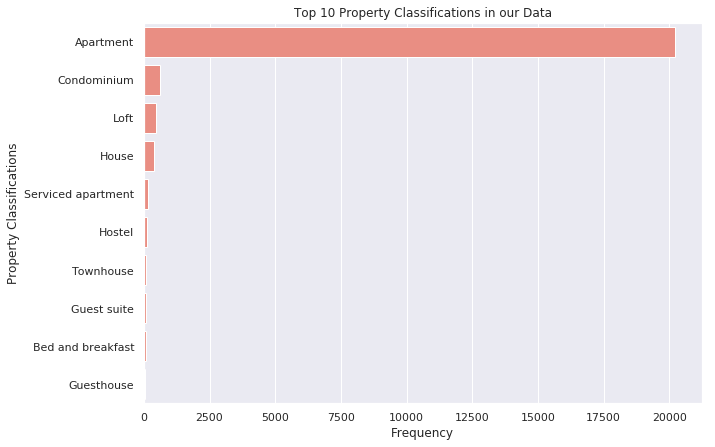

In [22]:
plt.figure(figsize=(10,7))

sns.barplot(y=property_type["property_type"], x=property_type["Frequency"], color="salmon")
plt.xlabel('Frequency')
plt.ylabel('Property Classifications')
plt.title('Top 10 Property Classifications in our Data')

* __It is clear that Appartments are largely available as compared to other property-type.__

In [0]:
# Counting Frequency of accommodates 

accommodates = pd.DataFrame(data['accommodates'].value_counts())

accommodates =accommodates.reset_index()
accommodates.columns= ["accommodates", "Frequency"]
accommodates = accommodates.sort_values('Frequency',ascending=False)



# Taking top 10 dominating accommodates 

accommodates =accommodates.nlargest(10, "Frequency")
#accommodates.head(10)

Text(0.5, 1.0, 'Top 10 Accommodates Classifications in our Data')

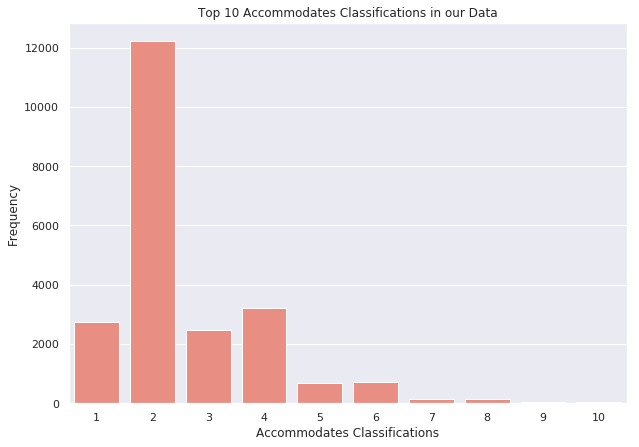

In [24]:
plt.figure(figsize=(10,7))


sns.barplot( y=accommodates["Frequency"],x=accommodates["accommodates"], color="salmon")
plt.ylabel('Frequency')
plt.xlabel('Accommodates Classifications')
plt.title('Top 10 Accommodates Classifications in our Data')

In [0]:
# Counting Frequency of bathrooms 

bathrooms = pd.DataFrame(data['bathrooms'].value_counts())

bathrooms =bathrooms.reset_index()
bathrooms.columns= ["bathrooms", "Frequency"]
bathrooms = bathrooms.sort_values('Frequency',ascending=False)



# Taking top 10 dominating bathrooms 

bathrooms =bathrooms.nlargest(10, "Frequency")
#bathrooms.head(10)

Text(0.5, 1.0, 'Top 10 Bathrooms Classifications in our Data')

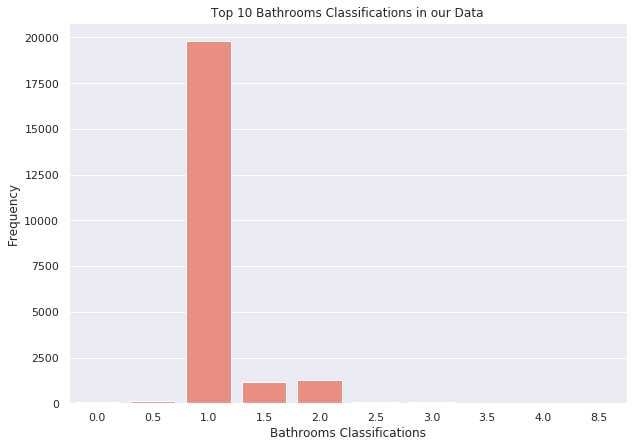

In [26]:
plt.figure(figsize=(10,7))

sns.barplot( y=bathrooms["Frequency"],x=bathrooms["bathrooms"], color="salmon")
plt.ylabel('Frequency')
plt.xlabel('Bathrooms Classifications')
plt.title('Top 10 Bathrooms Classifications in our Data')

In [0]:
# Counting Frequency of bedrooms 

bedrooms = pd.DataFrame(data['bedrooms'].value_counts())

bedrooms =bedrooms.reset_index()
bedrooms.columns= ["bedrooms", "Frequency"]
bedrooms = bedrooms.sort_values('Frequency',ascending=False)



# Taking top 10 dominating bedrooms 

bedrooms =bedrooms.nlargest(10, "Frequency")
#bedrooms.head(10)

Text(0.5, 1.0, 'Top 10 Bedrooms Classifications in our Data')

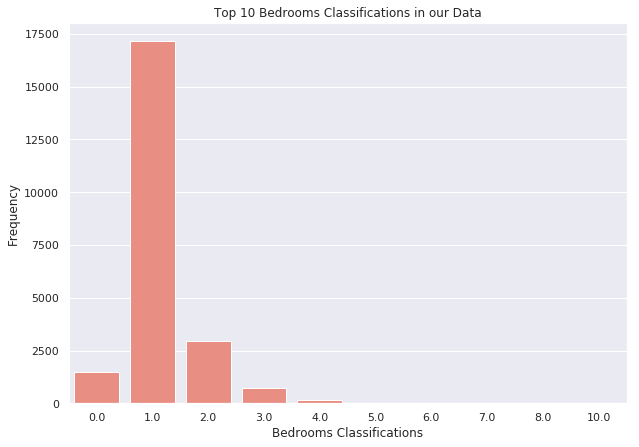

In [28]:
plt.figure(figsize=(10,7))

sns.barplot( y=bedrooms["Frequency"],x=bedrooms["bedrooms"], color="salmon")
plt.ylabel('Frequency')
plt.xlabel('Bedrooms Classifications')
plt.title('Top 10 Bedrooms Classifications in our Data')

In [0]:
# Counting Frequency of beds 

beds = pd.DataFrame(data['beds'].value_counts())

beds =beds.reset_index()
beds.columns= ["beds", "Frequency"]
beds = beds.sort_values('Frequency',ascending=False)



# Taking top 10 dominating beds

beds =beds.nlargest(10, "Frequency")
#beds.head(10)

Text(0.5, 1.0, 'Top 10 Beds Classifications in our Data')

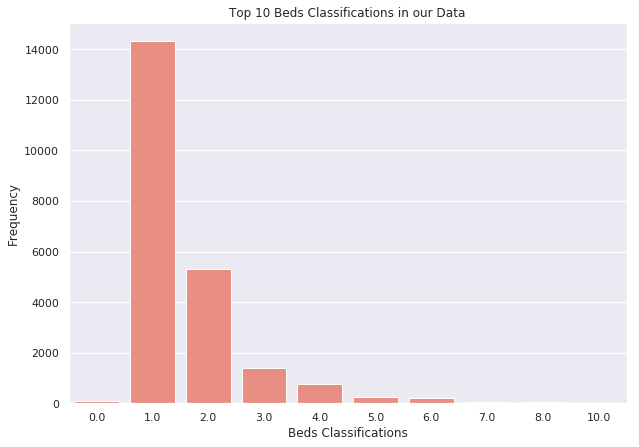

In [30]:
plt.figure(figsize=(10,7))

sns.barplot( y=beds["Frequency"],x=beds["beds"], color="salmon")
plt.ylabel('Frequency')
plt.xlabel('Beds Classifications')
plt.title('Top 10 Beds Classifications in our Data')

Text(0.5, 1.0, 'Instant Bookable Classifications in our Data')

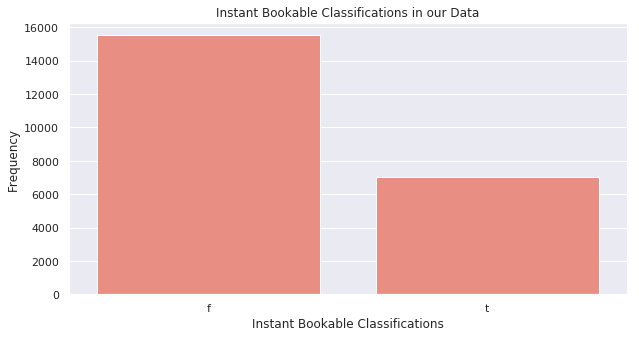

In [31]:
plt.figure(figsize=(10,5))

sns.countplot(x="instant_bookable", data=data, color="salmon")
plt.ylabel('Frequency')
plt.xlabel('Instant Bookable Classifications')
plt.title('Instant Bookable Classifications in our Data')

In [0]:
# Dividing review_scores_rating into 4-groups [0-70],[70-80],[80-90],[90-100].


binned_review=pd.cut(data["review_scores_rating"],10 )

Text(0.5, 1.0, 'Review Scores Rating Classifications in our Data')

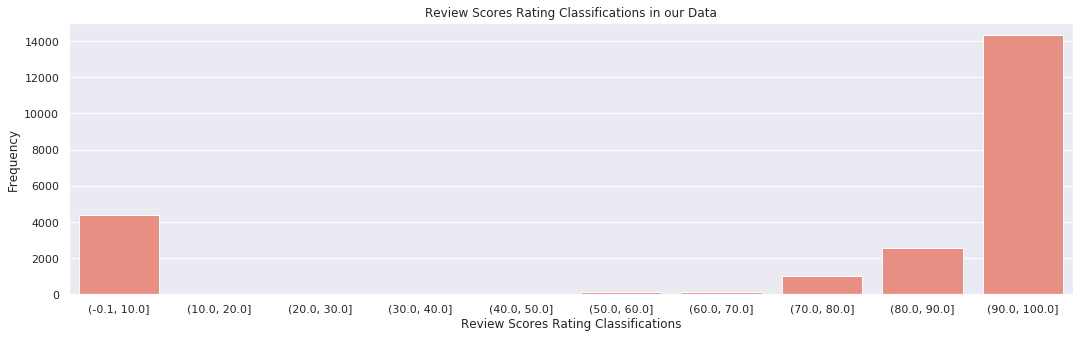

In [33]:
plt.figure(figsize=(18,5))

sns.countplot(binned_review, color="salmon")
plt.ylabel('Frequency')
plt.xlabel('Review Scores Rating Classifications')
plt.title('Review Scores Rating Classifications in our Data')

__In a general way, we can say that basic configuration of an apartment is single bedroom along with one or two beds and  single washroom with instant booking type "f" and review rating above 80.__

__Data Preprossesing:__

In [0]:
# remove $ sign

data["price"]= data["price"].str.replace("$","")
data['price'] = pd.to_numeric(data['price'], errors='coerce')


# mapping prperty_type

data["property_type"]= data["property_type"].map({'Guesthouse':1, 'Apartment':2, 'Condominium':3, 'Loft':4, 'House':5, 'Serviced apartment':6, 'Townhouse':7
                                                  , 'Boutique hotel':8, 'Bed and breakfast':9, 'Bungalow':10, 'Boat':11, 'Guest suite':12, 'Other':13, 'Island':14,
                                                  'Hostel':15,'Train':16, 'Camper/RV':17, 'Houseboat':18, 'Cabin':19, 'Cottage':20, 'Tiny house':21,
                                                  'Chalet':22, 'Castle':23, 'Villa':24, 'Aparthotel':25, 'Hotel':26, 'Tipi':27, 'Resort':28, 'In-law':29, 
                                                  'Cave':30, 'Barn':31, 'Pension (South Korea)':32, 'Casa particular (Cuba)':33
                                                       })

# mapping instant_bookable

data["instant_bookable"]= data["instant_bookable"].map({"f":1, "t":0})

In [35]:
data.head()

,property_type,accommodates,bathrooms,bedrooms,beds,square_feet,availability_30,availability_60,availability_90,availability_365,review_scores_rating,instant_bookable,price
0,1,3,1.0,1.0,2.0,0.0,0,21,51,141,93.0,1,60.0
1,2,2,1.0,1.0,1.0,0.0,0,0,0,0,100.0,1,17.0
2,2,4,1.0,1.0,2.0,720.0,0,0,0,220,92.0,0,90.0
3,2,2,1.0,1.0,1.0,0.0,0,0,22,297,88.0,1,26.0
4,2,2,1.0,1.0,2.0,0.0,15,26,26,26,96.0,1,42.0


In [0]:
# filling NaN values to 0

data= data.fillna(value=0)

In [0]:
data.dtypes

property_type             int64
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
square_feet             float64
availability_30           int64
availability_60           int64
availability_90           int64
availability_365          int64
review_scores_rating    float64
instant_bookable          int64
price                   float64
dtype: object

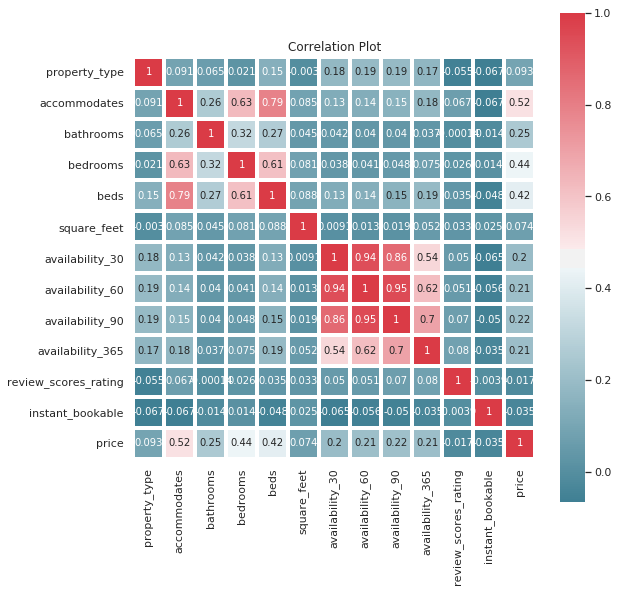

In [0]:
fig, ax =plt.subplots(figsize=(9, 9))
plt.title("Correlation Plot")
sns.heatmap(data.corr(), mask=np.zeros_like(data.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True,linewidths=3)
plt.show()

__Model Implementation:__

In [0]:
from sklearn.model_selection import train_test_split

X = data.drop('price',axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [0]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state = 0)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [0]:
y_pred_test = dtree.predict(X_test)
y_pred_train = dtree.predict(X_train)

__Model Evaluation:__

In [0]:
from sklearn import metrics

__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Price predictions

In [0]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [0]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 17.75072739660046
RMSE for test set is 53.744425457842276


__Reveiws Sentiment Analysis:__

In [0]:
reviews_summary= pd.read_csv("reviews_summary.csv")
print(reviews_summary.shape)
reviews_summary.head()

(401963, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."


In [0]:
from textblob import TextBlob

In [0]:
positive = 0
negative = 0
neutral = 0
polarity = 0
reviews_summary["comments"] =reviews_summary["comments"].astype(str)

In [0]:
for i in reviews_summary["comments"]:
    analysis = TextBlob(i)
    polarity = polarity + analysis.sentiment.polarity
    if(analysis.sentiment.polarity == 0.00):
        neutral = neutral + 1
    elif(analysis.sentiment.polarity > 0.00):
        positive = positive + 1
    elif(analysis.sentiment.polarity < 0.00):
        negative = negative + 1

In [0]:
def percentage (part,whole):
    a = 100 * float(part)/float(whole)
    return a

In [0]:
positive = percentage(positive,len(reviews_summary.comments))
negative = percentage(negative,len(reviews_summary.comments))
neutral = percentage(neutral,len(reviews_summary.comments))
#polarity = percentage(polarity,len(reviews_summary.comments))


print("positive =",positive,"%")
print("negative =",negative,"%")
print("neutral = ",neutral,"%")
#print("polarity = ",polarity,"")


positive = format(positive, ".2f")
negative = format(negative, ".2f")
neutral = format(neutral, ".2f")


positive = 76.93270276119941 %
negative = 1.7153320081699062 %
neutral =  21.35196523063068 %


In [0]:
print("How people are reacting on Berlin Airbnb Host by analyzing " , len(reviews_summary["comments"]) , " Reviews.")

if(polarity > 0.00):
    print("Positive")
elif(polarity == 0.00):
    print("Neutral")
elif(polarity < 0.00):
    print("Negative")

How people are reacting on Berlin Airbnb Host by analyzing  401963  Reviews.
Positive


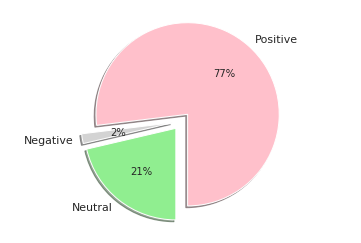

In [0]:
labels = "Positive", "Negative" , "Neutral"
sizes = [positive , negative , neutral]
colors = ["pink" , "lightgrey" , "lightgreen"]
explode = (0.1,0.1,0.1) 
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.0f%%', shadow=True, startangle=270)
 
plt.axis('equal')
plt.show()

